exp:  RNA
replicates separate
exp:  ATAC
replicates separate
dim:16x16
     rSham_r1  rSham_r2   rTAC_r1   rTAC_r2  rJQ1_w_r1  rJQ1_w_r2   rJQ1_r1  \
0    5.602826  5.354306  5.175837  4.918307   5.449507   5.291153  5.027703   
1    2.799600  2.818177  2.882740  3.131304   2.778364   2.510160  2.697451   
2    1.940865  1.746045  0.433695  0.302045   2.195709   2.363411  0.526659   
3    2.461912  1.850566  2.412927  1.569655   2.725827   1.635832  2.503163   
4    1.423172  0.589613  1.583340  1.796475   0.877960   1.306117  0.600936   
..        ...       ...       ...       ...        ...        ...       ...   
465  0.000000  1.362827  1.414257  1.105932   0.000000   2.210292  0.690066   
466  3.976549  4.048844  1.109711  3.873356   1.420409   4.037332  4.130888   
467  1.188162  1.661159  2.576162  1.955610   2.414169   2.014497  1.430650   
468  0.000000  1.158397  1.013360  1.187658   2.847944   2.002309  1.175782   
469  0.000000  0.000000  0.000000  1.101006   0.987196   0.0

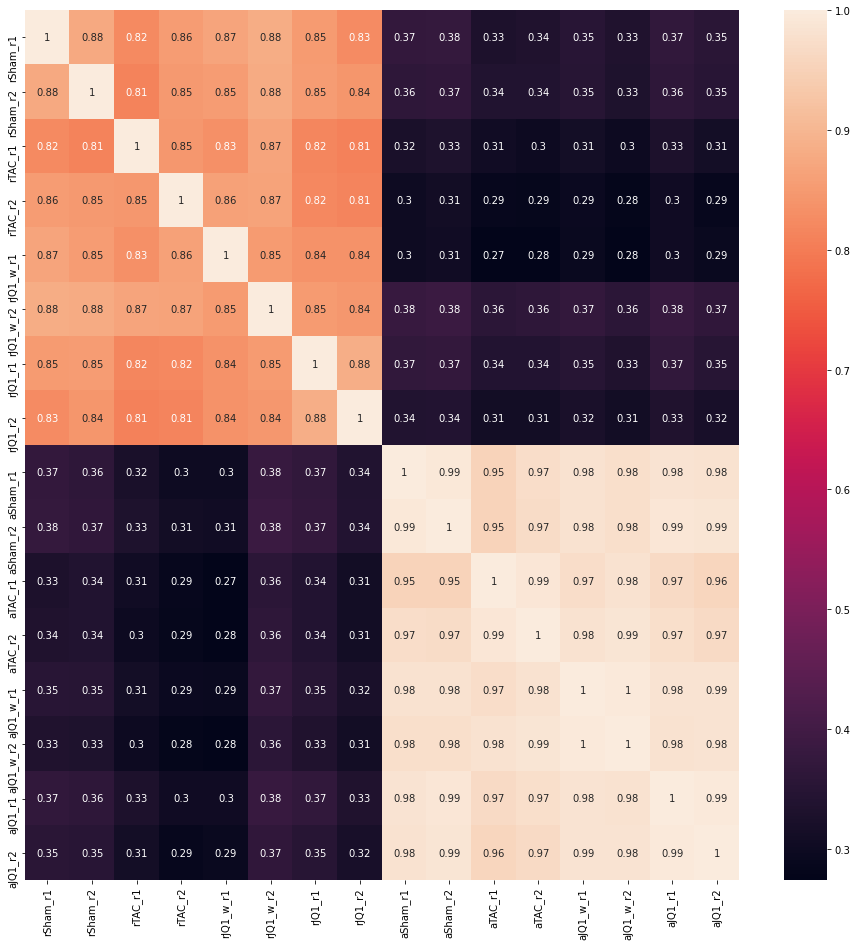

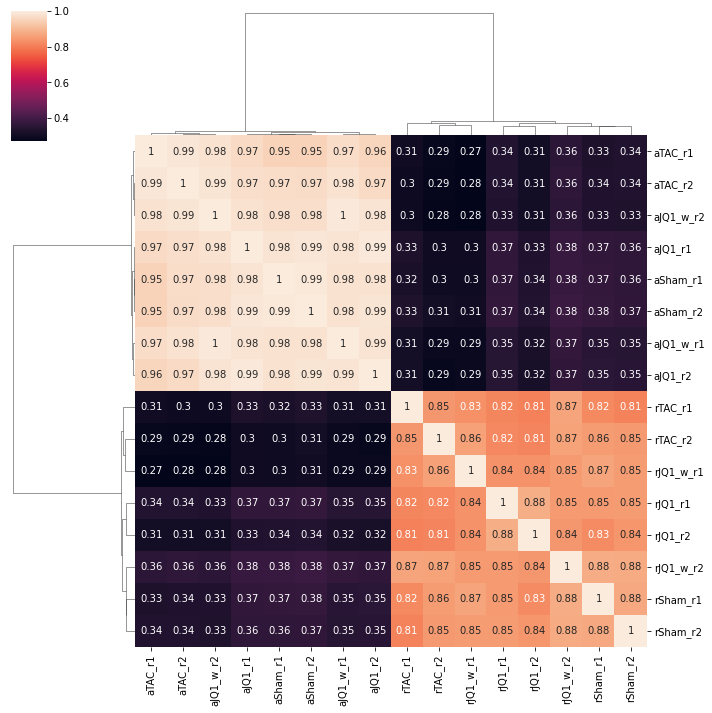

In [6]:
import data_science as ds 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
        
#wd = /pollard/home/smorin/Pollard-Lab
#data stored in : /pollard/data/projects/morin/Counts/

   
#----------------MAIN PROGRAM
rel_path = "../../../data/projects/morin/Counts/"
#store data in dictionary using key:sample, value: log(count+1) for CPM normalization
#and value: (log(count+1), length) for CPKM normalization


#retrieve samples from specified experiment
#experimental data
cpm_bool = False #False: normalize by cpkm, True: normalize by cpm
repl_bool = False #True:use sum of replicates, False: use r1, r2

#file holding 16 sample names
#8 samples per experiment 
samples_dir = "../../../data/projects/morin/Samples_Dir"


#normalize rna data
rnaDict= ds.run_ds_on_exp(samples_dir, rel_path, "RNA", cpm_bool, repl_bool)
# print(rnaDict)

#normalize atac data
atacDict= ds.run_ds_on_exp(samples_dir, rel_path, "ATAC", cpm_bool, repl_bool)

# print(atacDict)
#merge dictionaries
dim = ''
mergeDict = {}
if repl_bool:
    #make 8x8 matrix with replicates combined
    dim = '8x8'
    print('dim:' + dim)
    for key, values in rnaDict.items():
        mergeDict[key] = values
    for k, v in atacDict.items():
        mergeDict[k] = v
else:
    #make 16x16 matrix with replicates separate
    dim = '16x16'
    print('dim:' + dim)
    for key, values in rnaDict.items():
        mergeDict['r'+key] = values
    for k, v in atacDict.items():
        mergeDict['a'+k] = v
# print(mergeDict.keys())

#create dataframe 
df = pd.DataFrame(data=mergeDict)

print(df)  
    

# #not necessarily sequential analysis
# #-----------------Analysis part 1: Violin and Swarmplot--------------------
# #create figure objects 
# df1 = pd.DataFrame(data=rnaDict)
# df2 = pd.DataFrame(data=atacDict)
# violin = sns.violinplot(data=df1, inner = None)
# swarmplot = sns.swarmplot(data=df1,color="black", edgecolor="gray", size=2)

# #get figure and save figure
norm = '' 
if cpm_bool == True:
    norm = "CPM"
else:
    norm = "CPKM"
img_format = '.png'
# figure1 = "violin_swarmplot"
# filename1 = figure1 + '_' + exp + '_' + "samples" + '_' + norm + img_format
# # fig1 = swarmplot.get_figure()
# # fig1.savefig('images/'+filename1)


# #-----------------Analysis part 2: Heatmap and Clustermap------------------
#create correlation matrix using the pearson correlation coefficient
corr_matrix = df.corr(method = 'pearson')
print(corr_matrix)

plt.figure(figsize=(16,16))

heatmap = sns.heatmap(corr_matrix, annot=True)
cluster = sns.clustermap(corr_matrix, annot=True)
exp = "RNAvsATAC"
figure2 = "heatmap"
filename2 = figure2 + '_' + exp + '_' +  dim + '_' + norm + img_format
fig2 = heatmap.get_figure()
fig2.savefig('images/'+filename2,bbox_inches='tight')

figure3 = "clustermap"
filename3 = figure3 + '_' + exp + '_' + dim + '_' + norm + img_format
cluster.savefig('images/'+filename3)
